In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")

In [2]:
boston=load_boston()
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [3]:
data=pd.DataFrame(boston.data,columns=boston.feature_names)

In [4]:
target=pd.DataFrame(boston.target,columns=["target"])

In [5]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [7]:
df=pd.concat([data,target],axis=1)

In [8]:
#eda

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
print("shape of data frame ",df.shape)

shape of data frame  (506, 14)


In [11]:
print(f"number of rows in df {df.shape[0]} and number of columns {df.shape[1]}")

number of rows in df 506 and number of columns 14


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
#null values in df columns
for i in df.columns:
    print(f"null values in coloumn {i} are {df[i].isna().sum()}")

null values in coloumn CRIM are 0
null values in coloumn ZN are 0
null values in coloumn INDUS are 0
null values in coloumn CHAS are 0
null values in coloumn NOX are 0
null values in coloumn RM are 0
null values in coloumn AGE are 0
null values in coloumn DIS are 0
null values in coloumn RAD are 0
null values in coloumn TAX are 0
null values in coloumn PTRATIO are 0
null values in coloumn B are 0
null values in coloumn LSTAT are 0
null values in coloumn target are 0


<AxesSubplot:>

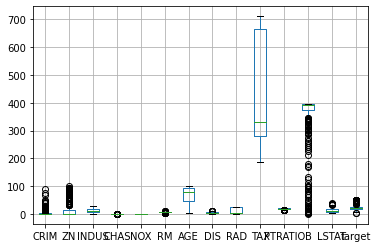

In [14]:
#outlier detection
df.boxplot()

<AxesSubplot:>

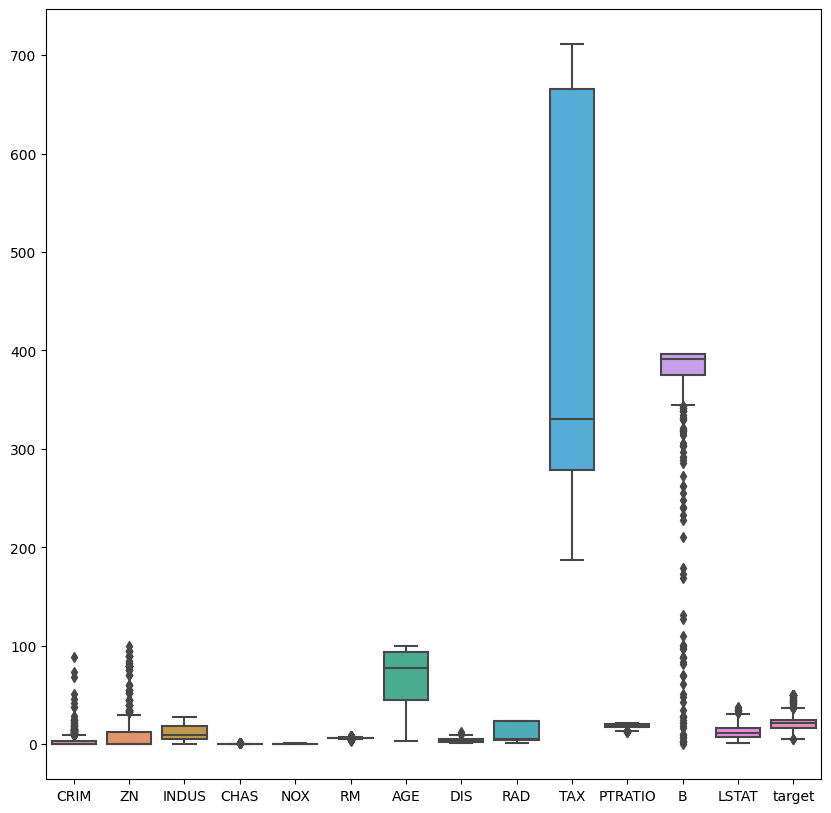

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

In [16]:
#unique values in df
for i in df.columns:
    print(f"unique values in {i} are {df[i].nunique()}")

unique values in CRIM are 504
unique values in ZN are 26
unique values in INDUS are 76
unique values in CHAS are 2
unique values in NOX are 81
unique values in RM are 446
unique values in AGE are 356
unique values in DIS are 412
unique values in RAD are 9
unique values in TAX are 66
unique values in PTRATIO are 46
unique values in B are 357
unique values in LSTAT are 455
unique values in target are 229


In [17]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

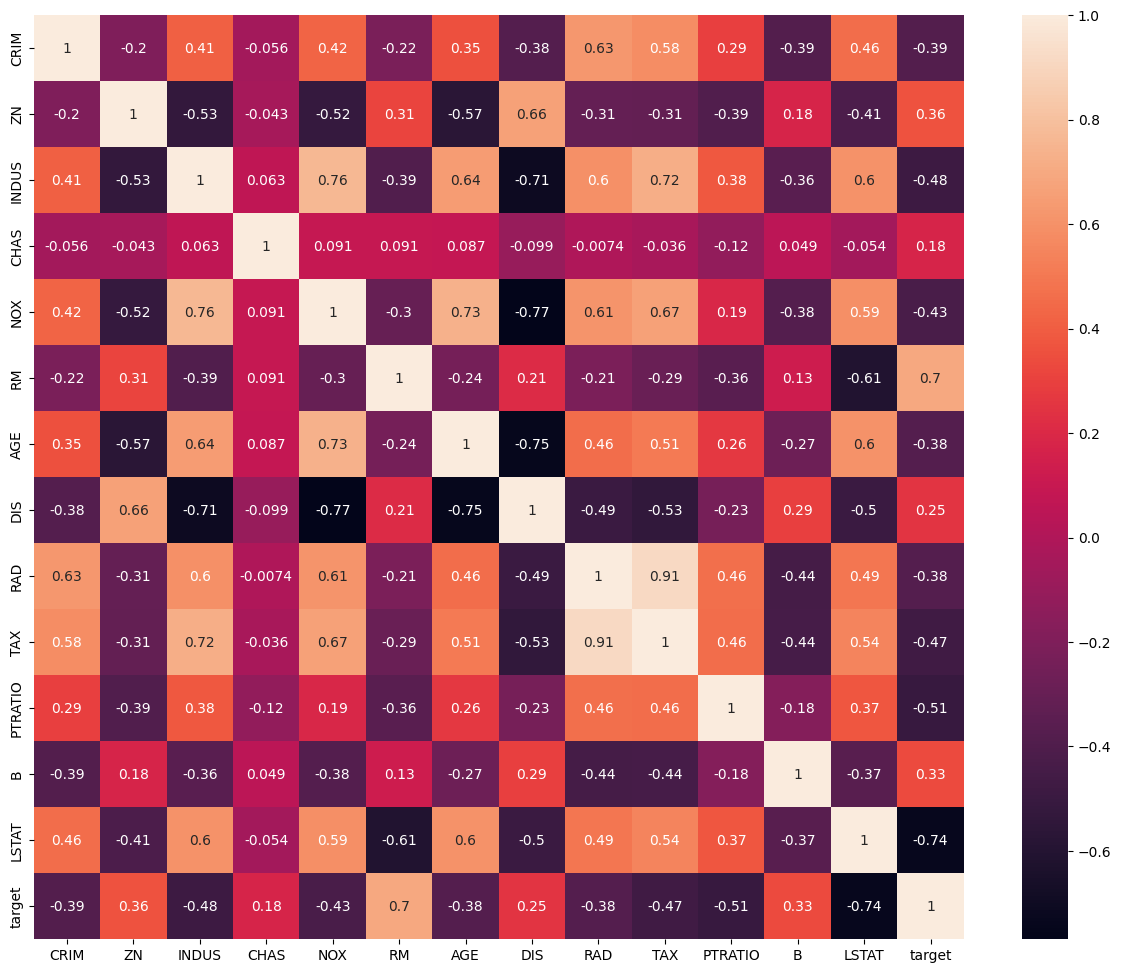

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [19]:
#sns.pairplot(df)

In [20]:
df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

<AxesSubplot:xlabel='CHAS', ylabel='count'>

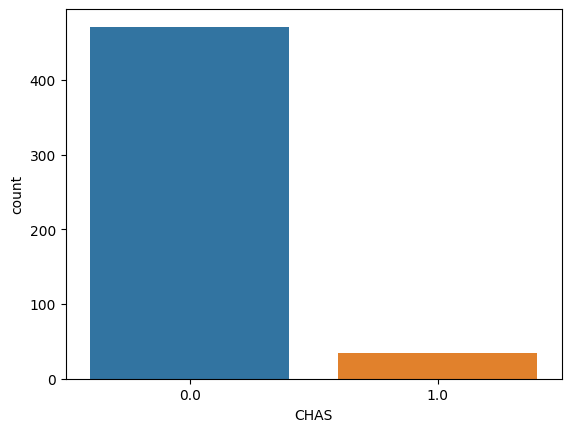

In [21]:
sns.countplot(df["CHAS"])

In [22]:
df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

<AxesSubplot:xlabel='RAD', ylabel='count'>

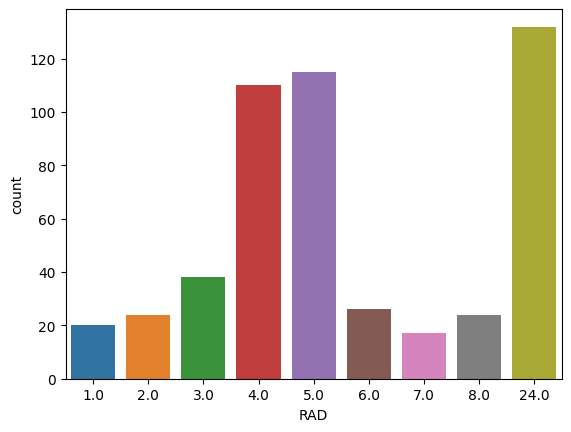

In [23]:
sns.countplot(df["RAD"])

In [24]:
df1=df.drop(["target"],axis=1)
vif_list=[]
vif_df=pd.DataFrame()
vif_df["features"]=df1.columns
for i in range (df1.shape[1]):
    vif=variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)

vif_df["vif"]=vif_list
vif_df



,features,vif
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


In [25]:
# feature engineering


In [26]:
x=df.drop(["target"],axis=1)
y=df["target"]

In [27]:
nor=MinMaxScaler()
result=nor.fit_transform(x)
nor_df=pd.DataFrame(result,columns=x.columns)
nor_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [28]:
new_df=pd.concat([nor_df,y],axis=1)

In [29]:
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,22.4
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,20.6
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,23.9
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,22.0


In [30]:
x=nor_df


In [31]:
#spliting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)
#model training
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [32]:
#pedictions 
y_pred_test=lr.predict(x_test)
y_pred_train=lr.predict(x_train)


In [33]:
#calculating residuals
test_residual=y_test-y_pred_test
train_residual=y_train-y_pred_train

In [34]:
# evaluating model
print("=======================test data evaluation========================")
mse=mean_squared_error(y_test,y_pred_test)
print("mse ",mse )
mae=mean_absolute_error(y_test,y_pred_test)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_test,y_pred_test)
print("r_2 val",r2)
print("=======================train data evaluation========================")
mse=mean_squared_error(y_train,y_pred_train)
print("mse ",mse )
mae=mean_absolute_error(y_train,y_pred_train)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_train,y_pred_train)
print("r_2 val",r2)

=======================test data evaluation========================
mse  26.94481224951804
mae  3.5673260189967886
rmse  5.190839262539155
r_2 val 0.6859495577055574
=======================train data evaluation========================
mse  20.898395484059517
mae  3.254220148215047
rmse  4.571476291534226
r_2 val 0.7511508467017517


<AxesSubplot:xlabel='target', ylabel='Density'>

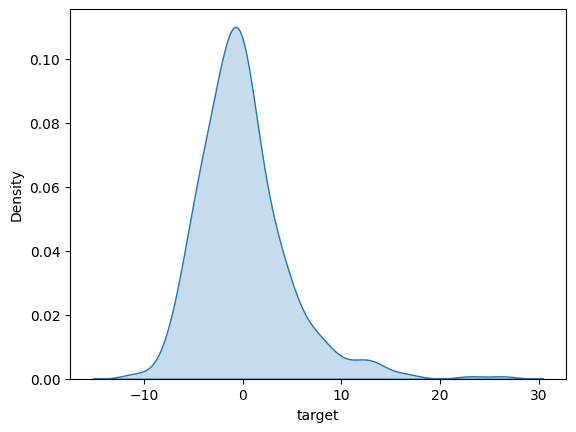

In [35]:
sns.kdeplot(train_residual,fill=True)

<AxesSubplot:xlabel='target', ylabel='Density'>

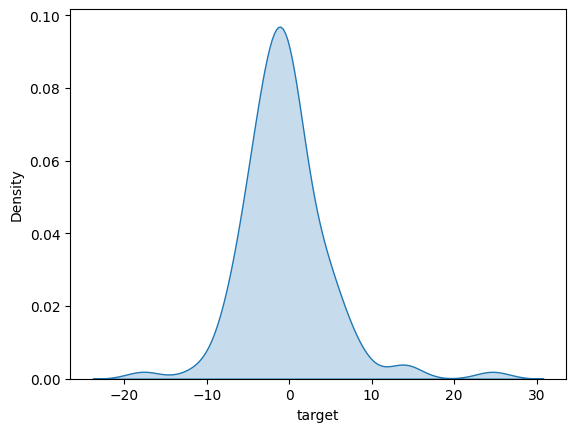

In [36]:
sns.kdeplot(test_residual,fill=True)

<AxesSubplot:ylabel='target'>

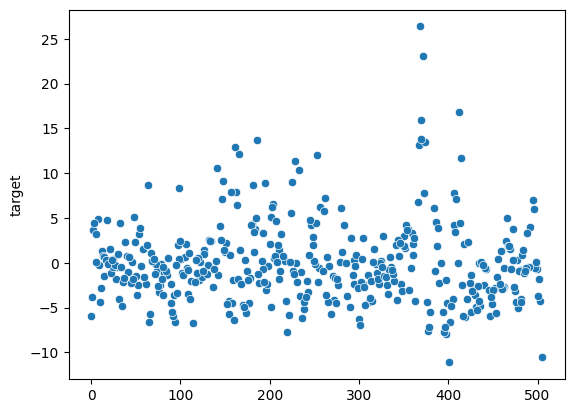

In [37]:
sns.scatterplot(data=train_residual)

In [38]:
from scipy.stats import kstest
_,pval=kstest(train_residual,"norm")
if pval>=0.05:
    print("null")
    print("normal")
else:
    print("alternate")
    print("not normal")


alternate
not normal


In [39]:
from scipy.stats import shapiro
_,pval=shapiro(train_residual)
if pval>=0.05:
    print("null")
    print("normal")
else:
    print("alternate")
    print("not normal")



alternate
not normal


In [40]:
from scipy.stats import normaltest
_,pval=normaltest(train_residual)
if pval>=0.05:
    print("null")
    print("normal")
else:
    print("alternate")
    print("not normal")


alternate
not normal


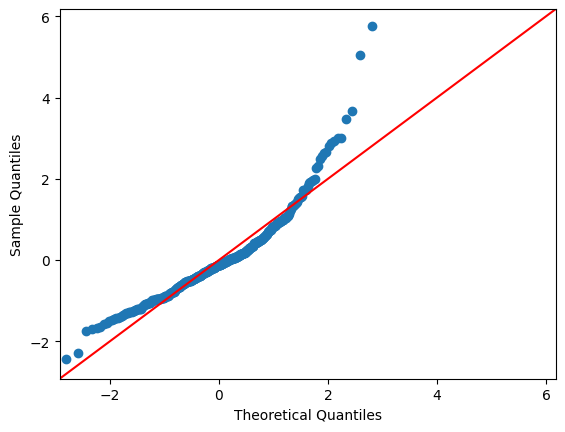

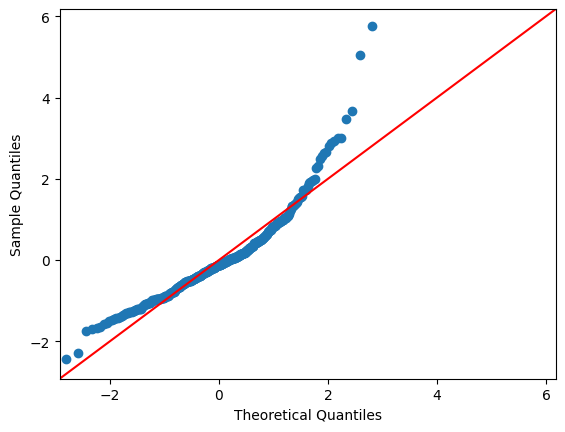

In [41]:
import statsmodels.api as sm
sm.qqplot(train_residual,line="45",fit=True)

<AxesSubplot:xlabel='target', ylabel='target'>

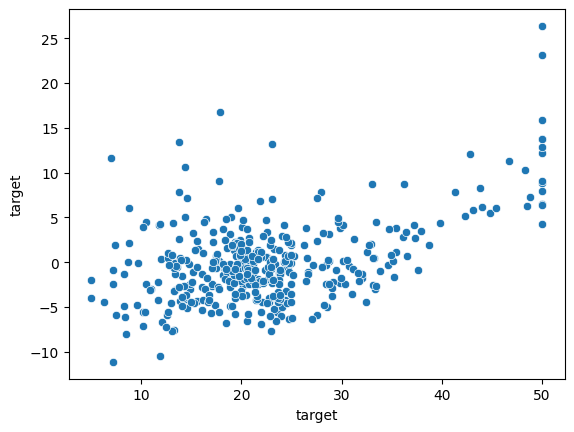

In [42]:
sns.scatterplot(x=y_train,y=train_residual)

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor(random_state=1)
rf=RandomForestRegressor(random_state=1)
ada=AdaBoostRegressor(random_state=1)
gb=GradientBoostingRegressor(random_state=1)

In [44]:
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
ada.fit(x_train,y_train)
gb.fit(x_train,y_train)

GradientBoostingRegressor(random_state=1)

In [46]:
y_pred_test=knn.predict(x_test)
y_pred_train=knn.predict(x_train)
# evaluating model
print("=======================test data evaluation========================")
mse=mean_squared_error(y_test,y_pred_test)
print("mse ",mse )
mae=mean_absolute_error(y_test,y_pred_test)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_test,y_pred_test)
print("r_2 val",r2)
print("=======================train data evaluation========================")
mse=mean_squared_error(y_train,y_pred_train)
print("mse ",mse )
mae=mean_absolute_error(y_train,y_pred_train)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_train,y_pred_train)
print("r_2 val",r2)

=======================test data evaluation========================
mse  27.33159607843137
mae  3.0088235294117647
rmse  5.227962899488803
r_2 val 0.6814414679323677
=======================train data evaluation========================
mse  13.491839603960395
mae  2.386138613861386
rmse  3.6731239570643943
r_2 val 0.8393449456709613


In [47]:
y_pred_test=dt.predict(x_test)
y_pred_train=dt.predict(x_train)
# evaluating model
print("=======================test data evaluation========================")
mse=mean_squared_error(y_test,y_pred_test)
print("mse ",mse )
mae=mean_absolute_error(y_test,y_pred_test)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_test,y_pred_test)
print("r_2 val",r2)
print("=======================train data evaluation========================")
mse=mean_squared_error(y_train,y_pred_train)
print("mse ",mse )
mae=mean_absolute_error(y_train,y_pred_train)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_train,y_pred_train)
print("r_2 val",r2)

=======================test data evaluation========================
mse  36.55794117647059
mae  3.342156862745098
rmse  6.046316331161528
r_2 val 0.5739054520207256
=======================train data evaluation========================
mse  0.0
mae  0.0
rmse  0.0
r_2 val 1.0


In [48]:
y_pred_test=rf.predict(x_test)
y_pred_train=rf.predict(x_train)
# evaluating model
print("=======================test data evaluation========================")
mse=mean_squared_error(y_test,y_pred_test)
print("mse ",mse )
mae=mean_absolute_error(y_test,y_pred_test)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_test,y_pred_test)
print("r_2 val",r2)
print("=======================train data evaluation========================")
mse=mean_squared_error(y_train,y_pred_train)
print("mse ",mse )
mae=mean_absolute_error(y_train,y_pred_train)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_train,y_pred_train)
print("r_2 val",r2)

=======================test data evaluation========================
mse  18.448642892156872
mae  2.6955000000000005
rmse  4.295188341872435
r_2 val 0.7849751408040438
=======================train data evaluation========================
mse  1.5693444232673266
mae  0.8370222772277219
rmse  1.252734777703296
r_2 val 0.9813129179576833


In [49]:
y_pred_test=ada.predict(x_test)
y_pred_train=ada.predict(x_train)
# evaluating model
print("=======================test data evaluation========================")
mse=mean_squared_error(y_test,y_pred_test)
print("mse ",mse )
mae=mean_absolute_error(y_test,y_pred_test)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_test,y_pred_test)
print("r_2 val",r2)
print("=======================train data evaluation========================")
mse=mean_squared_error(y_train,y_pred_train)
print("mse ",mse )
mae=mean_absolute_error(y_train,y_pred_train)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_train,y_pred_train)
print("r_2 val",r2)

=======================test data evaluation========================
mse  23.158582133125087
mae  3.065942195716283
rmse  4.812336452610633
r_2 val 0.7300792859690384
=======================train data evaluation========================
mse  7.712245364001567
mae  2.318842421089787
rmse  2.7770929699960654
r_2 val 0.9081658814274038


In [50]:
y_pred_test=gb.predict(x_test)
y_pred_train=gb.predict(x_train)
# evaluating model
print("=======================test data evaluation========================")
mse=mean_squared_error(y_test,y_pred_test)
print("mse ",mse )
mae=mean_absolute_error(y_test,y_pred_test)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_test,y_pred_test)
print("r_2 val",r2)
print("=======================train data evaluation========================")
mse=mean_squared_error(y_train,y_pred_train)
print("mse ",mse )
mae=mean_absolute_error(y_train,y_pred_train)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_train,y_pred_train)
print("r_2 val",r2)

=======================test data evaluation========================
mse  16.625391228942885
mae  2.5816406928412245
rmse  4.077424582863904
r_2 val 0.8062257246249303
=======================train data evaluation========================
mse  1.5909786050901107
mae  0.9968925162467703
rmse  1.2613400037619162
r_2 val 0.9810553073754256


In [54]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
y_pred_test=xg.predict(x_test)
y_pred_train=xg.predict(x_train)
# evaluating model
print("=======================test data evaluation========================")
mse=mean_squared_error(y_test,y_pred_test)
print("mse ",mse )
mae=mean_absolute_error(y_test,y_pred_test)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_test,y_pred_test)
print("r_2 val",r2)
print("=======================train data evaluation========================")
mse=mean_squared_error(y_train,y_pred_train)
print("mse ",mse )
mae=mean_absolute_error(y_train,y_pred_train)
print("mae ",mae)
rmse=np.sqrt(mse)
print("rmse ",rmse)
r2=r2_score(y_train,y_pred_train)
print("r_2 val",r2)

=======================test data evaluation========================
mse  19.93699015147459
mae  2.810283061569812
rmse  4.465085682433719
r_2 val 0.7676279753924604
=======================train data evaluation========================
mse  0.0004723344938741136
mae  0.014864029978761484
rmse  0.021733257783271096
r_2 val 0.9999943756429069


In [57]:
from sklearn.tree import plot_tree

[Text(0.710022187316823, 0.9722222222222222, 'X[5] <= 0.655\nsquared_error = 83.98\nsamples = 404\nvalue = 22.669'),
 Text(0.48303895259378665, 0.9166666666666666, 'X[12] <= 0.35\nsquared_error = 40.952\nsamples = 350\nvalue = 20.18'),
 Text(0.2681001795134818, 0.8611111111111112, 'X[7] <= 0.028\nsquared_error = 27.227\nsamples = 214\nvalue = 23.471'),
 Text(0.19950725381008205, 0.8055555555555556, 'X[12] <= 0.242\nsquared_error = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(0.19716258792497068, 0.75, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.20185191969519342, 0.75, 'squared_error = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.3366931052168816, 0.8055555555555556, 'X[5] <= 0.571\nsquared_error = 17.438\nsamples = 210\nvalue = 23.071'),
 Text(0.2065412514654162, 0.75, 'X[5] <= 0.487\nsquared_error = 8.581\nsamples = 162\nvalue = 21.597'),
 Text(0.15408851113716296, 0.6944444444444444, 'X[10] <= 0.851\nsquared_error = 5.849\nsamples = 76\nvalue = 20.163'),
 Text(0.1129835